In [1]:
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.feature_extraction import DictVectorizer

df_prep = pd.read_csv('C:/Users/Dell/Documents/book/unsuper/send for github/cleaned_data_for_prediction.csv')
df_prep = df_prep.drop(columns=['Unnamed: 0'])

In [2]:

df_prep.head()

,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,...,Have you been diagnosed with a mental health condition by a medical professional?,Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,3,1.0,1.0,Not eligible for coverage / N/A,I am not sure,No,No,I don't know,1,No,...,Yes,0,Not applicable to me,Not applicable to me,39,Male,United Kingdom,9,Back-end Developer,Sometimes
1,2,1.0,1.0,No,Yes,Yes,Yes,Yes,2,No,...,Yes,1,Rarely,Sometimes,29,Male,United States of America,5,Full track,Never
2,2,1.0,1.0,No,I am not sure,No,No,I don't know,3,Maybe,...,No,1,Not applicable to me,Not applicable to me,38,Male,United Kingdom,9,Back-end Developer,Always
3,2,0.0,0.0,Yes,Yes,No,No,No,3,Yes,...,Yes,1,Sometimes,Sometimes,43,Female,United States of America,5,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
4,6,1.0,1.0,Yes,I am not sure,No,Yes,Yes,2,Yes,...,No,1,Not applicable to me,Often,42,Male,United Kingdom,9,DevOps/SysAdmin|Support|Back-end Developer|Fro...,Sometimes


In [3]:
df_prep.isnull().sum()



How many employees does your company or organization have?                                                                                        0
Is your employer primarily a tech company/organization?                                                                                           0
Is your primary role within your company related to tech/IT?                                                                                      0
Does your employer provide mental health benefits as part of healthcare coverage?                                                                 0
Do you know the options for mental health care available under your employer-provided coverage?                                                   0
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?            0
Does your employer offer resources to learn more about mental health concerns and options for seeking help?     

In [4]:
encoder_dict = {
'Always':1,
'I am not sure':2,
"I don't know":0,
'I was aware of some':2,
'Maybe':2,
'Maybe/Not sure':2,
'N/A (not currently aware)':0,
'Neither easy nor difficult':3,
'Neutral':3,
'Never':0,
'No':0,
'No, at none of my previous employers':0,
"No, I don't think it would":0,
"No, I don't think they would":0,       
'No, I only became aware later':0,      
'No, it has not':0,
'No, none did':0,
'No, they do not':0,
'None did':0,
'None of them':0,
'Not applicable to me':0,
'Not applicable to me (I do not have a mental illness)':0,
'Not eligible for coverage / N/A':0,
'Not eligible for coverage / N/A':0,
'Not open at all':0,
'Often':1,
'Rarely':0,
'Some did':2,
'Some of my previous employers':2,      
'Some of them':2,
'Sometimes':2,
'Somewhat difficult':4,
'Somewhat easy':2,
'Somewhat not open':2,
'Somewhat open':2,
'Very difficult':5,
'Very easy':1,
'Very open':1,
'Yes':1,
'Yes, all of them':1,
'Yes, always':1,
'Yes, at all of my previous employers':1,
'Yes, I experienced':1,
'Yes, I observed':1,
'Yes, I think it would':1,
'Yes, I think they would':1,
'Yes, I was aware of all of them':1,    
'Yes, it has':1,
'Yes, they all did':1,
'Yes, they do':1
}
columns = df_prep.columns
def get_val(key):
        value = encoder_dict.get(key)
        return (value)
for i in columns:
        c1 = df_prep[i].unique()
        for j in c1:
            if j in encoder_dict:
                get = get_val(j)
                df_prep[i][df_prep[i] == j] = get 


In [5]:
df_prep.isnull().sum()
df_prep.head()

,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,...,Have you been diagnosed with a mental health condition by a medical professional?,Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,3,1.0,1.0,0,2,0,0,0,1,0,...,1,0,0,0,39,Male,United Kingdom,9,Back-end Developer,2
1,2,1.0,1.0,0,1,1,1,1,2,0,...,1,1,0,2,29,Male,United States of America,5,Full track,0
2,2,1.0,1.0,0,2,0,0,0,3,2,...,0,1,0,0,38,Male,United Kingdom,9,Back-end Developer,1
3,2,0.0,0.0,1,1,0,0,0,3,1,...,1,1,2,2,43,Female,United States of America,5,Executive Leadership|Supervisor/Team Lead|Dev ...,2
4,6,1.0,1.0,1,2,0,1,1,2,1,...,0,1,0,1,42,Male,United Kingdom,9,DevOps/SysAdmin|Support|Back-end Developer|Fro...,2


In [6]:
df_prep['What is your gender?'] = df_prep['What is your gender?'].map({'Female': 1, "Male":0,'Other':2})
df_prep.drop('Which of the following best describes your work position?',  axis=1, inplace=True)
df_prep['What is your gender?'] = df_prep['What is your gender?'].fillna(0)


In [7]:
def country_encoding(country):
    if country == "USA":
        return 1
    elif country == "UK":
        return 2
    elif country == "Canada":
        return 3
    elif country == "Germany":
        return 4
    elif country == "Netherlands":
        return 5
    elif country == "Australia":
        return 6
    else:
        return 7
df_prep['What country do you work in?'] = df_prep['What country do you work in?'].apply(country_encoding)

In [8]:
df_prep.head()

,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,...,Do you currently have a mental health disorder?,Have you been diagnosed with a mental health condition by a medical professional?,Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you work in?,What US state or territory do you work in?,Do you work remotely?
0,3,1.0,1.0,0,2,0,0,0,1,0,...,0,1,0,0,0,39,0.0,7,9,2
1,2,1.0,1.0,0,1,1,1,1,2,0,...,1,1,1,0,2,29,0.0,7,5,0
2,2,1.0,1.0,0,2,0,0,0,3,2,...,0,0,1,0,0,38,0.0,7,9,1
3,2,0.0,0.0,1,1,0,0,0,3,1,...,1,1,1,2,2,43,1.0,7,5,2
4,6,1.0,1.0,1,2,0,1,1,2,1,...,1,0,1,0,1,42,0.0,7,9,2


In [9]:
# check is there any string in dataset 
is_string = df_prep.values.tolist()
string.ascii_lowercase
strings = list(string.ascii_lowercase)
stringsy = list(string.ascii_uppercase)

if is_string not in strings:
    print('True')

if is_string not in stringsy:
    print('True')
df_prep.to_csv('C:/Users/Dell/Documents/book/unsuper/send for github/clean_encode_data_for_prediction.csv')


True
True


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1146 samples in 0.001s...


  File "C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 1440, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


[t-SNE] Computed neighbors for 1146 samples in 0.271s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1146
[t-SNE] Computed conditional probabilities for sample 1146 / 1146
[t-SNE] Mean sigma: 0.904541
[t-SNE] Computed conditional probabilities in 0.108s
[t-SNE] Iteration 50: error = 65.4507751, gradient norm = 0.0000000 (50 iterations in 0.492s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: 65.450775
[t-SNE] Iteration 100: error = 1.8207358, gradient norm = 0.0189015 (50 iterations in 0.493s)
[t-SNE] Iteration 150: error = 1.6740980, gradient norm = 0.0070839 (50 iterations in 0.357s)
[t-SNE] Iteration 200: error = 1.6271889, gradient norm = 0.0085460 (50 iterations in 0.358s)
[t-SNE] Iteration 250: error = 1.5955181, gradient norm = 0.0057988 (50 iterations in 0.357s)
[t-SNE] Iteration 300: error = 1.5792608, gradient norm = 0.0046405 (50 iterations in 0.353s)
[t-SNE] Iteration 350: error = 1

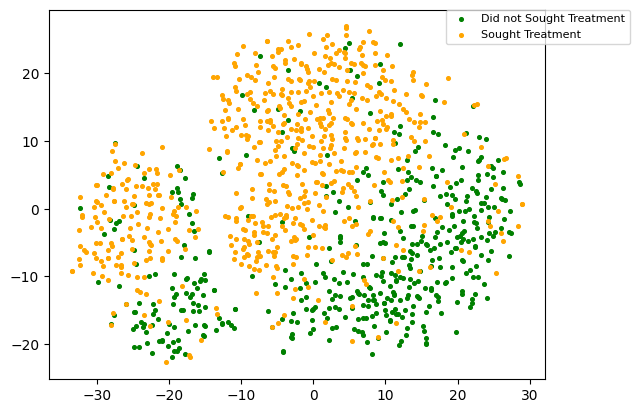

In [10]:
df_clean = pd.read_csv('C:/Users/Dell/Documents/book/unsuper/send for github/clean_encode_data_for_prediction.csv')

df_clean = df_clean.drop(columns=['Unnamed: 0'])
string_get = 'Have you ever sought treatment for a mental health issue from a mental health professional?' 
Y = df_clean.loc[:, df_clean.columns == string_get].values.ravel()
x_vars = df_clean.loc[:, df_clean.columns != (string_get)]
xx = x_vars.values 
min_max_scaler = preprocessing.MinMaxScaler()
xx_scaled = min_max_scaler.fit_transform(xx)
x_vars  = pd.DataFrame(xx_scaled)
# transform to dictionary
dict_df = x_vars.to_dict('records')
# transform to vector
v = DictVectorizer(sparse=False)
X = v.fit_transform(dict_df)
data_embed=TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(X)
df_embed = pd.DataFrame(data_embed)
df_embed['Y'] = Y
no_treatment = df_embed[df_embed['Y'] == 0]
x_axis_no = no_treatment[0]
y_axis_no = no_treatment[1]
yes_treatment = df_embed[df_embed['Y'] == 1]
x_axis_yes = yes_treatment[0]
y_axis_yes = yes_treatment[1]
plt.scatter(x_axis_no, y_axis_no, color='green', label="Did not Sought Treatment", s=7)
plt.scatter(x_axis_yes, y_axis_yes, color='orange', label="Sought Treatment", s=7)
plt.legend(bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.0, fontsize=8)
plt.savefig('C:/Users/Dell/Documents/book/unsuper/send for github/TSNE.png')
#plt.legend(bbox_to_anchor=(1, 1))

plt.show()


0.8765586034912718
0.875
[[280  46]
 [ 53 423]]
[[143  20]
 [ 23 158]]


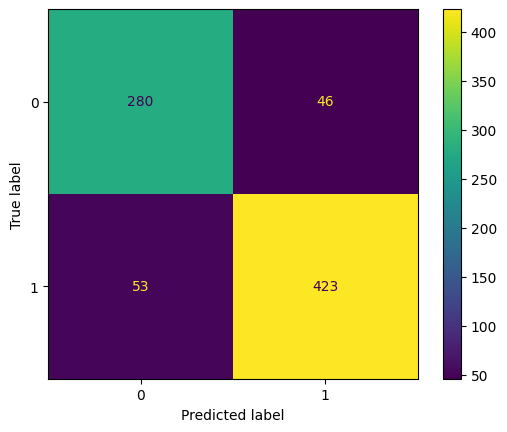

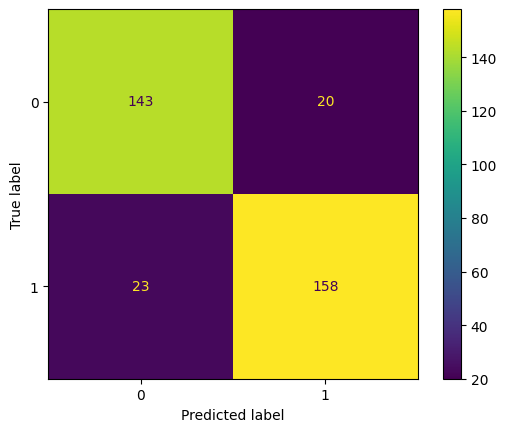

In [11]:
# prediction

y = df_clean.loc[:, df_clean.columns == string_get].values.ravel()
X = df_clean.loc[:, df_clean.columns != string_get]
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.30)
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, Y_train)
print(accuracy_score(clf.predict(X_train), Y_train))
print(accuracy_score(clf.predict(X_val), Y_val))
CM_train = confusion_matrix(Y_train, clf.predict(X_train))
CM_val = confusion_matrix(Y_val, clf.predict(X_val))
print(CM_train)
print(CM_val)
predictions = clf.predict(X_train)
cm = confusion_matrix(Y_train, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
predictions = clf.predict(X_val)
cm = confusion_matrix(Y_val, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
 

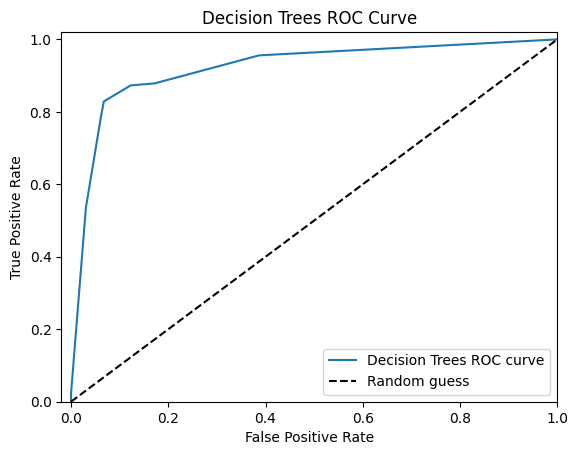

In [12]:
from sklearn.metrics import roc_curve
y_pred_prob = clf.predict_proba(X_val)[:,1]
%matplotlib inline
fpr, tpr, thresholds = roc_curve(Y_val, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='Decision Trees ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('Decision Trees ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

plt.savefig('C:/Users/Dell/Documents/book/unsuper/send for github/roc.png')

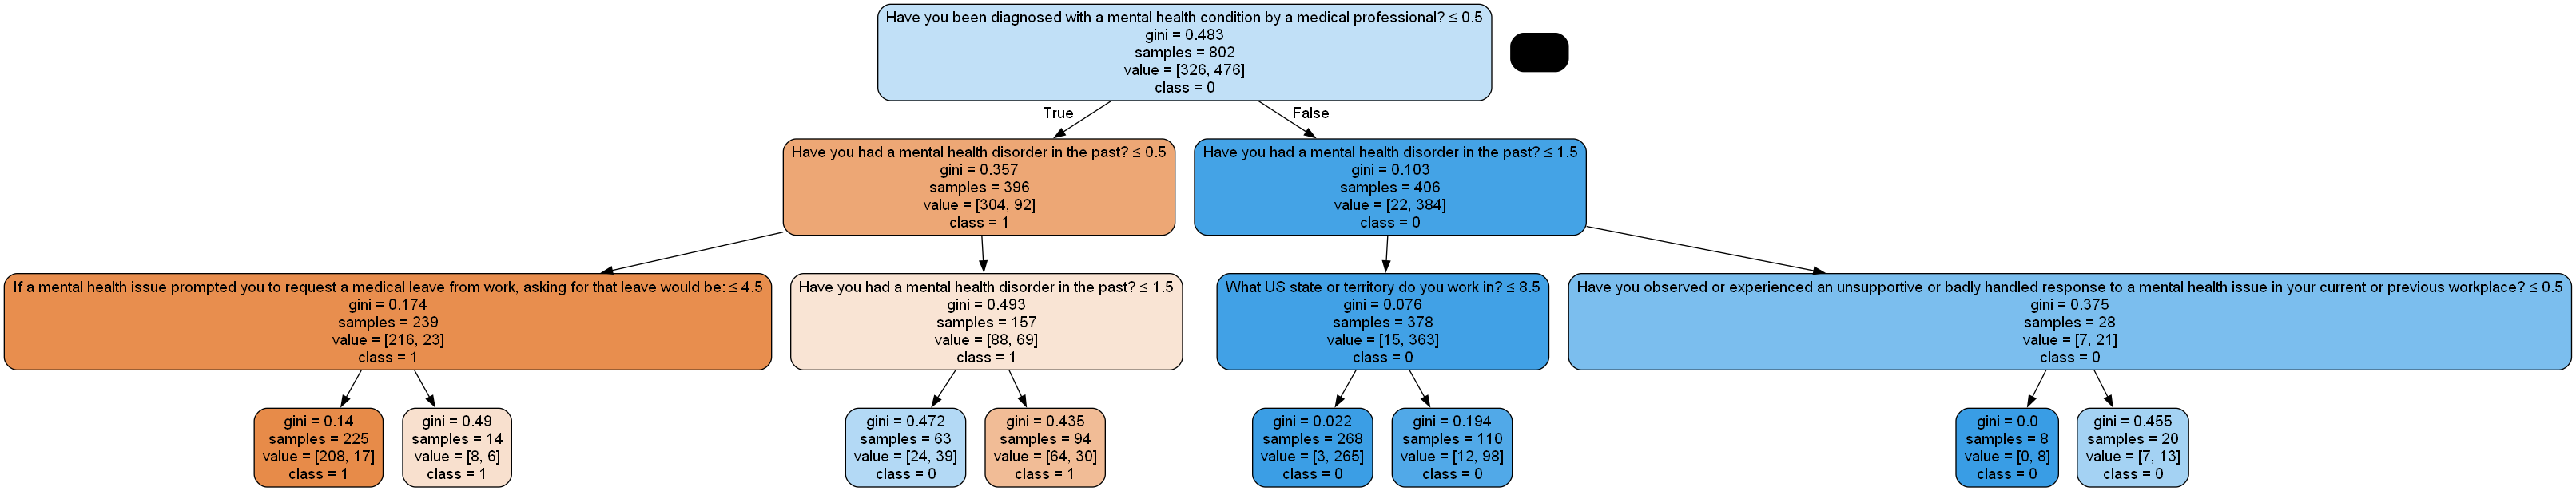

In [13]:
from io import StringIO
from sklearn import tree
import pydotplus 
from IPython.display import Image 
import graphviz
 
dotfile = StringIO() 
tree.export_graphviz(clf, out_file=dotfile, feature_names=X_train.columns, class_names=['1', '0'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dotfile.getvalue())
Image(graph.create_png())

0.8517441860465116
[[116  29]
 [ 22 177]]


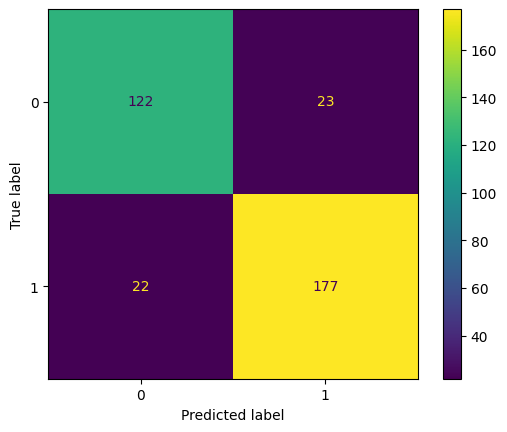

In [14]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.30)
forest = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=0)
forest.fit(X_train, Y_train)
print(accuracy_score(forest.predict(X_val), Y_val))
CM = confusion_matrix(Y_val, forest.predict(X_val))
print(CM)
#plot_confusion_matrix(forest, X_val, Y_val, cmap=plt.cm.Blues)
plt.show()
predictions = clf.predict(X_val)
cm = confusion_matrix(Y_val, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [15]:


names = ['SVC', 'Logistic Regression', 'RandomForestClassifier', 'Decision Tree', 'GradientBoostingClassifier', 'XG Boost']
models = [SVC(), LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(), \
         GradientBoostingClassifier(), XGBClassifier()]
model_dict = dict(zip(models, names))


In [16]:
def model_fit(model, X_train, Y_train):
    model.fit(X_train, Y_train)
    train_score = roc_auc_score(Y_train, model.predict(X_train))
    test_score = roc_auc_score(Y_val, model.predict(X_val))
    return (train_score, test_score)
    
accuracy_list = []
def model_search_report(X_train, Y_train):
    # prepare scores
    train_scores = {}
    test_scores = {}
    for model, name in model_dict.items():
        train_score, test_score = model_fit(model, X_train, Y_train)
        train_scores[name] = train_score
        test_scores[name] = test_score 

    # prepare reports
    report = pd.DataFrame()
    report['model'] = names
    report['train_score'] = train_scores.values()
    report['test_score'] = test_scores.values()
    
    print(report.sort_values(by='test_score'))
    

In [17]:
 model_search_report(X_train, Y_train)

                        model  train_score  test_score
0                         SVC     0.813541    0.785808
3               Decision Tree     1.000000    0.793242
4  GradientBoostingClassifier     0.959645    0.842211
2      RandomForestClassifier     1.000000    0.850043
1         Logistic Regression     0.873090    0.859747
5                    XG Boost     1.000000    0.861965


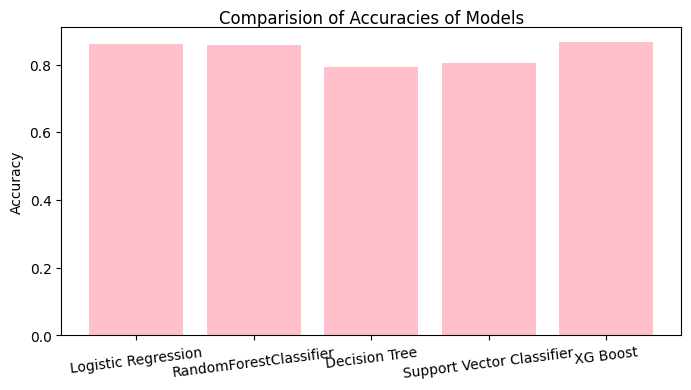

In [18]:
    
models = [('Logistic Regression',LogisticRegression()),
          ('RandomForestClassifier',RandomForestClassifier()),
          ('Decision Tree',DecisionTreeClassifier()),
          ('Support Vector Classifier',SVC()),
          ('XG Boost',XGBClassifier())]

accuracy_list = []
for model in models:
    model[1].fit(X_train, Y_train)
    y_pred = model[1].predict(X_val)
    accuracy_list.append(accuracy_score(Y_val, y_pred))
plt.figure(figsize=(8, 4))
model_names = [x[0] for x in models]
y_pos = range(len(models))
#plt.bar(y_pos, accuracy_list, align='center', alpha=0.5)
plt.bar(y_pos, accuracy_list, color='pink')
plt.xticks(y_pos, [x[0] for x in models], rotation=7, fontsize= 10)
plt.ylabel('Accuracy')
plt.title('Comparision of Accuracies of Models',  fontweight=10,
          pad='2.0')

plt.savefig('C:/Users/Dell/Documents/book/unsuper/send for github/pred.png')

plt.show()

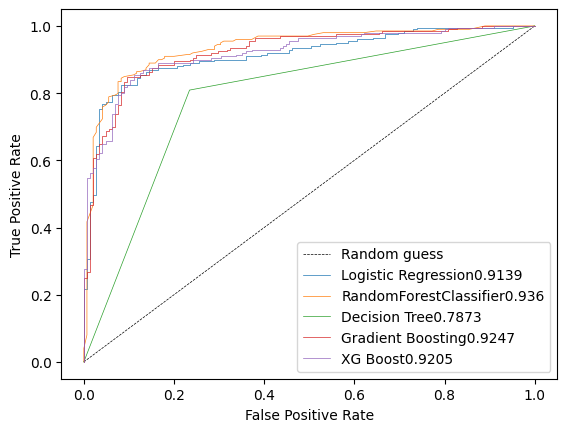

In [19]:
models = [('Logistic Regression',LogisticRegression()),
          ('RandomForestClassifier',RandomForestClassifier()),
          ('Decision Tree',DecisionTreeClassifier()),
          ("Gradient Boosting",GradientBoostingClassifier()),
          ('XG Boost',XGBClassifier())]
plt.plot([0, 1], [0, 1], 'k--', label='Random guess', linewidth=0.5)
for model in models:
    model[1].fit(X_train, Y_train)
    y_pred = model[1].predict_proba(X_val)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(Y_val, y_pred)
    auc = round(metrics.roc_auc_score(Y_val, y_pred), 4)
    model_names = [x[0] for x in models]
    plt.plot(fpr,tpr,label= model[0]+str(auc), linewidth=0.5)
    _ = plt.xlabel('False Positive Rate')
    _ = plt.ylabel('True Positive Rate')   
    plt.legend()
        

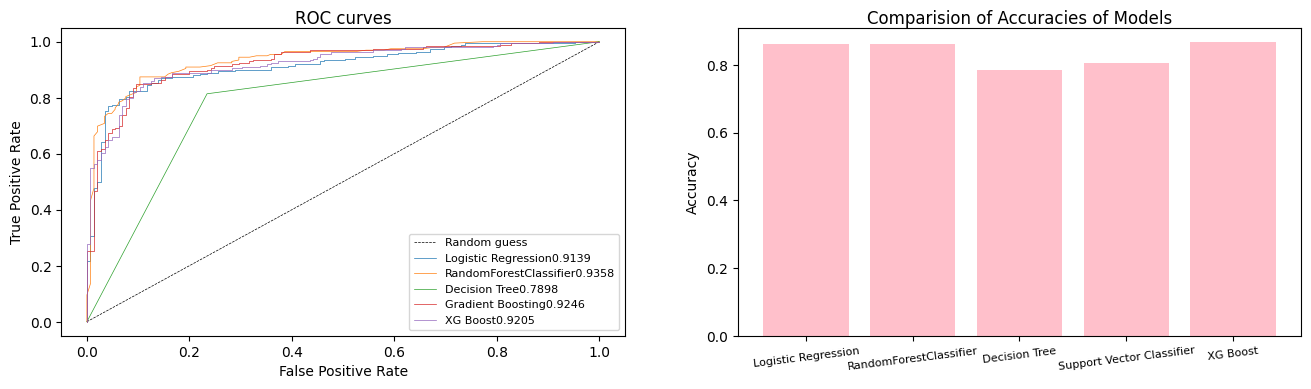

In [20]:
models = [('Logistic Regression',LogisticRegression()),
          ('RandomForestClassifier',RandomForestClassifier()),
          ('Decision Tree',DecisionTreeClassifier()),
          ("Gradient Boosting",GradientBoostingClassifier()),
          ('XG Boost',XGBClassifier())]
fig, (ax1, ax2) = plt.subplots(figsize = (16, 4), ncols=2, nrows=1)
#fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot([0, 1], [0, 1], 'k--', label='Random guess', linewidth=0.5)
for model in models:
    model[1].fit(X_train, Y_train)
    y_pred = model[1].predict_proba(X_val)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(Y_val, y_pred)
    auc = round(metrics.roc_auc_score(Y_val, y_pred), 4)
    model_names = [x[0] for x in models]
    ax1.plot(fpr,tpr,label= model[0]+str(auc), linewidth=0.5)
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')  
    ax1.set_title('ROC curves',  fontweight=10,pad='2.0')

    ax1.legend(fontsize="8")

models = [('Logistic Regression',LogisticRegression()),
          ('RandomForestClassifier',RandomForestClassifier()),
          ('Decision Tree',DecisionTreeClassifier()),
          ('Support Vector Classifier',SVC()),
          ('XG Boost',XGBClassifier())]

accuracy_list = []
for model in models:
    model[1].fit(X_train, Y_train)
    y_pred = model[1].predict(X_val)
    accuracy_list.append(accuracy_score(Y_val, y_pred))
#plt.figure(figsize=(8, 4))
model_names = [x[0] for x in models]
y_pos = range(len(models))
ax2.bar(y_pos, accuracy_list, color='pink')
ax2.set_xticks(y_pos, [x[0] for x in models], rotation=7, fontsize= 8)
ax2.set_ylabel('Accuracy')
ax2.set_title('Comparision of Accuracies of Models',  fontweight=10,pad='2.0')
fig.savefig('C:/Users/Dell/Documents/book/unsuper/send for github/mix.png')
